## Creating a model to predict the temperture of a day based on the temperture of last 7 days.

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns

In [4]:
df = pd.read_csv('weather_2012.csv')
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [7]:
data = df['Temp (C)'].values.reshape(-1,1)
data

array([[-1.8],
       [-1.8],
       [-1.8],
       ...,
       [-0.5],
       [-0.2],
       [ 0. ]])

In [8]:
data.shape

(8784, 1)

In [15]:
'''
    create a matrix with 8 column. the last column is the temperture of day we want to predict.
    the other columns are temperture of last 7 days.
'''
data2 = np.hstack((data[0:-7,:], data[1:-6,:], data[2:-5,:], data[3:-4,:], 
                   data[4:-3,:], data[5:-2,:], data[6:-1,:], data[7:,:]))


In [10]:
data2.shape

(8777, 8)

In [13]:
data2[:10,:] # show 10 first rows. 7 columns are feature and the last column is targer

array([[-1.8, -1.8, -1.8, -1.5, -1.5, -1.4, -1.5, -1.4],
       [-1.8, -1.8, -1.5, -1.5, -1.4, -1.5, -1.4, -1.4],
       [-1.8, -1.5, -1.5, -1.4, -1.5, -1.4, -1.4, -1.3],
       [-1.5, -1.5, -1.4, -1.5, -1.4, -1.4, -1.3, -1. ],
       [-1.5, -1.4, -1.5, -1.4, -1.4, -1.3, -1. , -0.5],
       [-1.4, -1.5, -1.4, -1.4, -1.3, -1. , -0.5, -0.2],
       [-1.5, -1.4, -1.4, -1.3, -1. , -0.5, -0.2,  0.2],
       [-1.4, -1.4, -1.3, -1. , -0.5, -0.2,  0.2,  0.8],
       [-1.4, -1.3, -1. , -0.5, -0.2,  0.2,  0.8,  1.8],
       [-1.3, -1. , -0.5, -0.2,  0.2,  0.8,  1.8,  2.6]])

In [16]:
x = data2[:,:-1]
y = data2[:,-1]

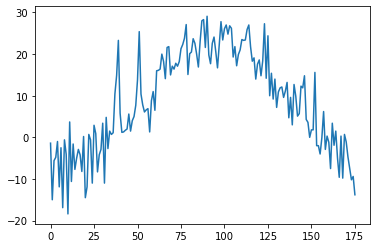

In [18]:
plt.plot(y[::50]);

In [19]:
model = LinearRegression()
model.fit(x,y)
model.score(x,y)

0.9939274956170541

In [21]:
y_p = model.predict(x)

In [22]:
mean_absolute_error(y, y_p)

0.6292650014604205